-------------------------------------------
查看总体情况
-------------------------------------------
去检测在数据样本中哪些是具有欺诈行为的
-------------------------------------------
欺诈与时间序列分布关系
Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64
-------------------------------------------


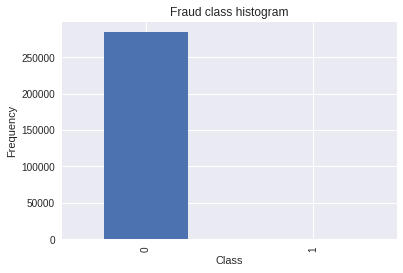

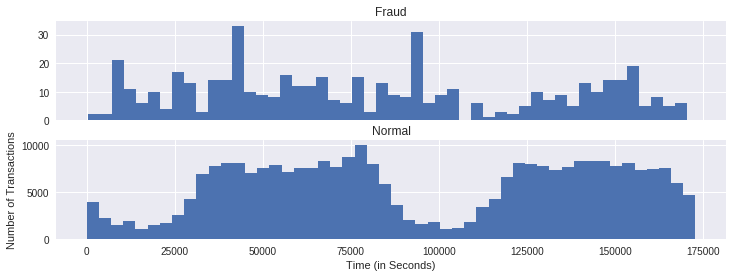

-------------------------------------------
如图所示，欺诈交易没有明显的周期性，一直都比较均匀，但是正常交易有明显的时间周期性。
-------------------------------------------
欺诈和金额Amount的关系和分布情况
Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
-------------------------------------------
()
Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
-------------------------------------------


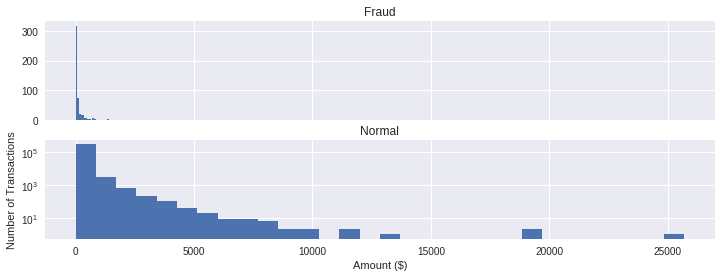

In [4]:
# -*- coding: utf-8 -*-
#https://mp.weixin.qq.com/s?__biz=MzI0NDk2OTU2Ng==&mid=2247483651&idx=1&sn=26945c87559147763e2a7f972548f574&chksm=e954f832de2371244bd3ba59b12ac4c0c6d5e229c6817edb7e89972f48ec2d945a4997af7b4b&mpshare=1&scene=1&srcid=0829N9WwAan4NQCSIprHShpE&pass_ticket=BDJxWX%2BqdSUedgtHMFVNqysq2r1JktTw5V6JJaoqA%2BXd9nJB5wzIBdBNyP9DiRpC#rd
#http://www.cnblogs.com/lilyloveu/p/6827007.html
#http://blog.csdn.net/y0367/article/details/51501780
from __future__ import division 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import seaborn as sns
sns.set(color_codes=True)#导入seaborn包设定颜色
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report
from sklearn import metrics
import itertools
%matplotlib inline



originaldata=pd.read_csv('creditcard.csv')
originaldata.head()
print('-------------------------------------------')
print("查看总体情况")
originaldata.describe()
print('-------------------------------------------')
print("去检测在数据样本中哪些是具有欺诈行为的")
count_classes=pd.value_counts(originaldata['Class'],sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
print('-------------------------------------------')
print("欺诈与时间序列分布关系")
print("Fraud")
print(originaldata.Time[originaldata.Class ==1].describe())
print("")
print("Normal")
print(originaldata.Time[originaldata.Class == 0].describe())
print('-------------------------------------------')
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins=50
ax1.hist(originaldata.Time[originaldata.Class ==1], bins=bins)
ax1.set_title('Fraud')
ax2.hist(originaldata.Time[originaldata.Class ==0], bins=bins)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()
print('-------------------------------------------')
print("如图所示，欺诈交易没有明显的周期性，一直都比较均匀，但是正常交易有明显的时间周期性。")


print('-------------------------------------------')
print("欺诈和金额Amount的关系和分布情况")
print("Fraud")
print(originaldata.Amount[originaldata.Class ==1].describe())
print('-------------------------------------------')
print()
print("Normal")
print(originaldata.Amount[originaldata.Class == 0].describe())
print('-------------------------------------------')
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins=30
ax1.hist(originaldata.Amount[originaldata.Class ==1], bins=bins)
ax1.set_title('Fraud')
ax2.hist(originaldata.Amount[originaldata.Class ==0], bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()



-------------------------------------------
-------------------------------------------
-------------------------------------------
对差异较大的列进行标准化操作
-------------------------------------------
(284807, 29) (284807, 1)
class=1--->存在欺诈行为，class＝0--->不存在欺诈行为
找class＝0的个数
number_records_normal is 284315
Number of data points in the minority class
找class＝1的个数
number_records_fraud is 492
-------------------------------------------


/home/bids/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


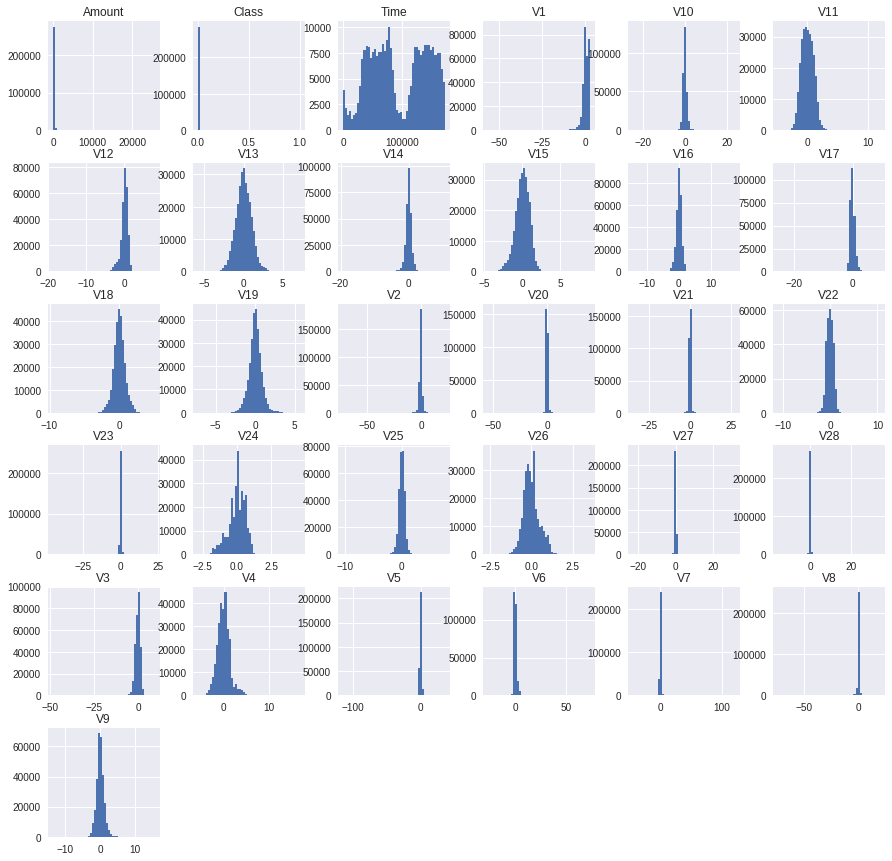

In [5]:
print('-------------------------------------------')
originaldata.hist(figsize=(15,15), bins=50)
print('-------------------------------------------')
# print("查看这些自变量之间的相关性")
# small = data[v_features]
# pd.scatter_matrix(small,figsize=(18,12))
# print("相关性，相关系数")
# cov=np.corrcoef(small.T)
# plt.figure(figsize=(12,7))
# img = plt.matshow(cov,cmap=plt.cm.winter)
# print("相关性矩阵图")
# plt.colorbar(img, ticks=[-1,0,1])
# plt.show()



print('-------------------------------------------')
print("对差异较大的列进行标准化操作")
originaldata['normAmount']=StandardScaler().fit_transform(originaldata['Amount'].reshape(-1,1))
originaldata=originaldata.drop(['Time','Amount'],axis=1)
originaldata.head()
print('-------------------------------------------')

# columns=data.columns
# # The labels are in the last column ('Class'). Simply remove it to obtain features columns
# features_columns=columns.delete(len(columns)-1)
# features=data[features_columns]
# labels=data['Class']


x_original=originaldata.ix[:,originaldata.columns!='Class']
y_original=originaldata.ix[:,originaldata.columns=='Class']
# print("The shape of original data is %s" %(x.shape))
# print("The shape of original label is %s" %(y.shape))
print x_original.shape, y_original.shape
print("class=1--->存在欺诈行为，class＝0--->不存在欺诈行为")
print("找class＝0的个数")
number_records_normal=len(originaldata[originaldata.Class==0])
print("number_records_normal is %s" %number_records_normal)
print("Number of data points in the minority class")
print("找class＝1的个数")
number_records_fraud=len(originaldata[originaldata.Class==1])
print("number_records_fraud is %s" %number_records_fraud)
print('-------------------------------------------')


In [6]:
#under_sample_split
data = originaldata
x = x_original
y = y_original

test_size_ration=0.3
defaultnumber=0
k = 5

In [7]:
print("找出存在欺诈行为的数据的index")
fraud_indices=np.array(data[data.Class==1].index)
print("")
print("Picking the indices of the normal classes")
normal_indices=data[data.Class==0].index
#print("Out of the indices we picked, randomly select "x" number (number_records_fraud)")
random_normal_indices=np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indices=np.array(random_normal_indices)
print("")
print("Appending the 2 indices")
under_sample_indices=np.concatenate([fraud_indices,random_normal_indices])
print("The length of under_sample_indices is: %s" %(len(under_sample_indices)))
print("Under_sample_dataset")
under_sample_data=data.iloc[under_sample_indices,:]
print("The undersample_data and label")
X_undersample=under_sample_data.ix[:,under_sample_data.columns!='Class']
Y_undersample=under_sample_data.ix[:,under_sample_data.columns=='Class']
#print("The shape of X_undersample is %s" %(X_undersample.shape))
#print("The shape of Y_undersample is %s" %(Y_undersample.shape))
print("")
print("Showing ratio")
print("The length of under_sample_data on Class 0 is: %s" %(len(under_sample_data[under_sample_data.Class==0])))
print("The length of under_sample_data on Class 1 is: %s" %(len(under_sample_data[under_sample_data.Class==1])))
print('Percentage of normal transactions:',len(under_sample_data[under_sample_data.Class==0])/len(under_sample_data))
print('Percentage of fraud transactions:',len(under_sample_data[under_sample_data.Class==1])/len(under_sample_data))
print('Total number of transactions in resampled data:',len(under_sample_data))
print("The under_sample is done")
print('-------------------------------------------')
print("原始数据切分,Whole dataset")
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=test_size_ration, random_state=defaultnumber)
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))
print("")
print("Undersampled dataset")

X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample,Y_undersample,test_size=test_size_ration, random_state=defaultnumber)
print("")
print("Number transactions under_sample_train dataset: ", len(X_train_undersample))
print("Number transactions under_sample_test dataset: ", len(X_test_undersample))
print("Total number of under_sample transactions: ", len(X_train_undersample)+len(X_test_undersample))
print('-------------------------------------------')

找出存在欺诈行为的数据的index

Picking the indices of the normal classes

Appending the 2 indices
The length of under_sample_indices is: 984
Under_sample_dataset
The undersample_data and label

Showing ratio
The length of under_sample_data on Class 0 is: 492
The length of under_sample_data on Class 1 is: 492
('Percentage of normal transactions:', 0.5)
('Percentage of fraud transactions:', 0.5)
('Total number of transactions in resampled data:', 984)
The under_sample is done
-------------------------------------------
原始数据切分,Whole dataset
('Number transactions train dataset: ', 199364)
('Number transactions test dataset: ', 85443)
('Total number of transactions: ', 284807)

Undersampled dataset

('Number transactions under_sample_train dataset: ', 688)
('Number transactions under_sample_test dataset: ', 296)
('Total number of under_sample transactions: ', 984)
-------------------------------------------


In [8]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
#printing_Kfold_scores
x_train_data=X_train_undersample
y_train_data=y_train_undersample
x_test_data=X_test_undersample
y_test_data=y_test_undersample

In [10]:
fold = KFold(len(y_train_data),k,shuffle=False) 

print("Different C parameters")
c_param_range = [0.01,0.1,1,10,100]

results_table_LogisticRegression = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
results_table_LogisticRegression['C_parameter'] = c_param_range


Different C parameters


In [15]:
# the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
j = 0
for c_param in c_param_range:
	print('-------------------------------------------')
	print('C parameter: ', c_param)
	print('-------------------------------------------')
	print('')
	recall_accs = []
	for iteration, indices in enumerate(fold,start=1):
		
		# Call the logistic regression model with a certain C parameter
		lr = LogisticRegression(C = c_param, penalty='l1')
		# Use the training data to fit the model. In this case, we use the portion of the fold to train the model
		# with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
		lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
		# Predict values using the test indices in the training data
		y_pred_train = lr.predict(x_train_data.iloc[indices[1],:].values)
		# Calculate the recall score and append it to a list for recall scores representing the current c_parameter
		recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_train)
		recall_accs.append(recall_acc)
		print('The Classifier is LogisticRegression', ':Iteration ', iteration,': recall score = ', recall_acc)
	# The mean value of those recall scores is the metric we want to save and get hold of.
	results_table_LogisticRegression.ix[j,'Mean recall score'] = np.mean(recall_accs)
	j += 1
	print('')
	print('Mean recall score ', np.mean(recall_accs))
	print('')
best_c = results_table_LogisticRegression.loc[results_table_LogisticRegression['Mean recall score'].idxmax()]['C_parameter']
# Finally, we can check which C parameter is the best amongst the chosen.
print('*********************************************************************************')
print('Best model to choose from cross validation is with C parameter = ', best_c)
print('*********************************************************************************')


-------------------------------------------
('C parameter: ', 0.01)
-------------------------------------------

('The Classifier is LogisticRegression', ':Iteration ', 1, ': recall score = ', 0.95890410958904104)
('The Classifier is LogisticRegression', ':Iteration ', 2, ': recall score = ', 0.95890410958904104)
('The Classifier is LogisticRegression', ':Iteration ', 3, ': recall score = ', 1.0)
('The Classifier is LogisticRegression', ':Iteration ', 4, ': recall score = ', 0.97297297297297303)
('The Classifier is LogisticRegression', ':Iteration ', 5, ': recall score = ', 0.98484848484848486)

('Mean recall score ', 0.97512593539990777)

-------------------------------------------
('C parameter: ', 0.1)
-------------------------------------------

('The Classifier is LogisticRegression', ':Iteration ', 1, ': recall score = ', 0.84931506849315064)
('The Classifier is LogisticRegression', ':Iteration ', 2, ': recall score = ', 0.86301369863013699)
('The Classifier is LogisticRegression

model
('Recall metric in the testing dataset: ', 0.94557823129251706)


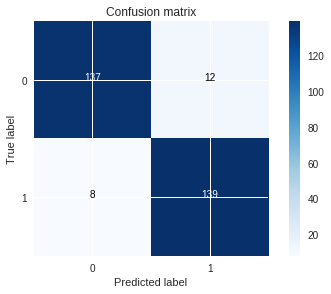

confusion matrix
[[137  12]
 [  8 139]]
classification report
             precision    recall  f1-score   support

          0       0.94      0.92      0.93       149
          1       0.92      0.95      0.93       147

avg / total       0.93      0.93      0.93       296

Accuracy: 0.932432
Area under the curve: 0.932521


In [17]:
from sklearn import metrics
lr = LogisticRegression(C=best_c, penalty='l1')
lr.fit(x_train_data,y_train_data.values.ravel())
print('model')
y_pred = lr.predict(x_test_data.values)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_data,y_pred)
np.set_printoptions(precision=2)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()
print('confusion matrix')
print(metrics.confusion_matrix(y_test_data,y_pred))
print('classification report')
print(metrics.classification_report(y_test_data,y_pred))
print('Accuracy: %f' %(metrics.accuracy_score(y_test_data,y_pred)))
print('Area under the curve: %f' %(metrics.roc_auc_score(y_test_data,y_pred)))


('Recall metric in the testing dataset: ', 1.0)
('Recall metric in the testing dataset: ', 1.0)
('Recall metric in the testing dataset: ', 1.0)
('Recall metric in the testing dataset: ', 0.99319727891156462)
('Recall metric in the testing dataset: ', 0.94557823129251706)
('Recall metric in the testing dataset: ', 0.891156462585034)
('Recall metric in the testing dataset: ', 0.83673469387755106)
('Recall metric in the testing dataset: ', 0.74829931972789121)
('Recall metric in the testing dataset: ', 0.57823129251700678)


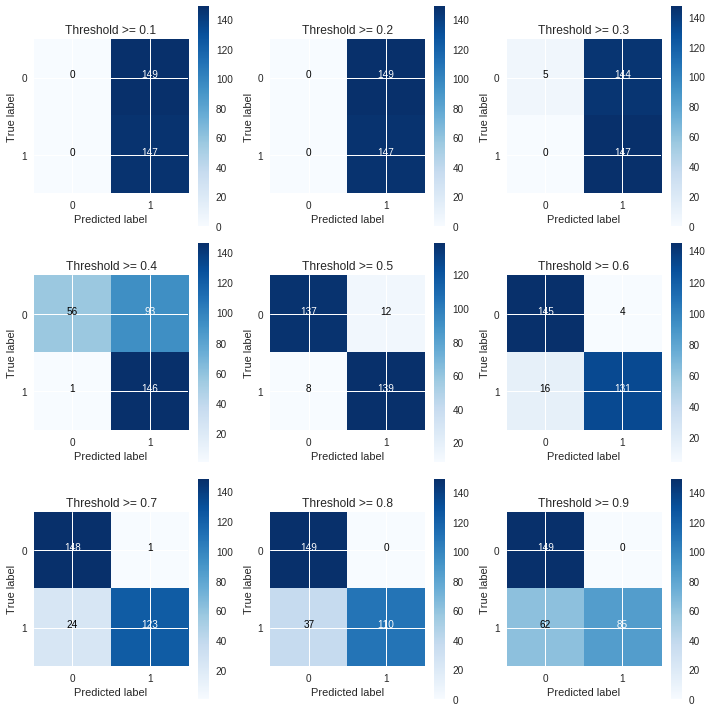

In [18]:
y_pred_proba = lr.predict_proba(x_test_data.values)
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize=(10,10))
j = 1
for i in thresholds:
	y_test_predictions_high_recall = y_pred_proba[:,1] > i
	plt.subplot(3,3,j)
	j += 1
	# Compute confusion matrix
	cnf_matrix = confusion_matrix(y_test_data,y_test_predictions_high_recall)
	np.set_printoptions(precision=2)
	print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
	# Plot non-normalized confusion matrix
	class_names = [0,1]
	plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s'%i) 